<h3><b>Exercise set 3 - seaborn-module and data exploration</b></h3>

<h4><b>1. In this exercise, use the 'penguins' dataset from seaborn! </b></h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Load example dataset from seaborn
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<ul>
<li>Create a pair plot of the data</li>
<ul>
    <li style="color: red; font-weight: bold;">What correlations can you immediately see?</li>
    <li><b>Bonus extra task:</b> check out the correlation matrix for this dataset too</li>
</ul>
</ul>

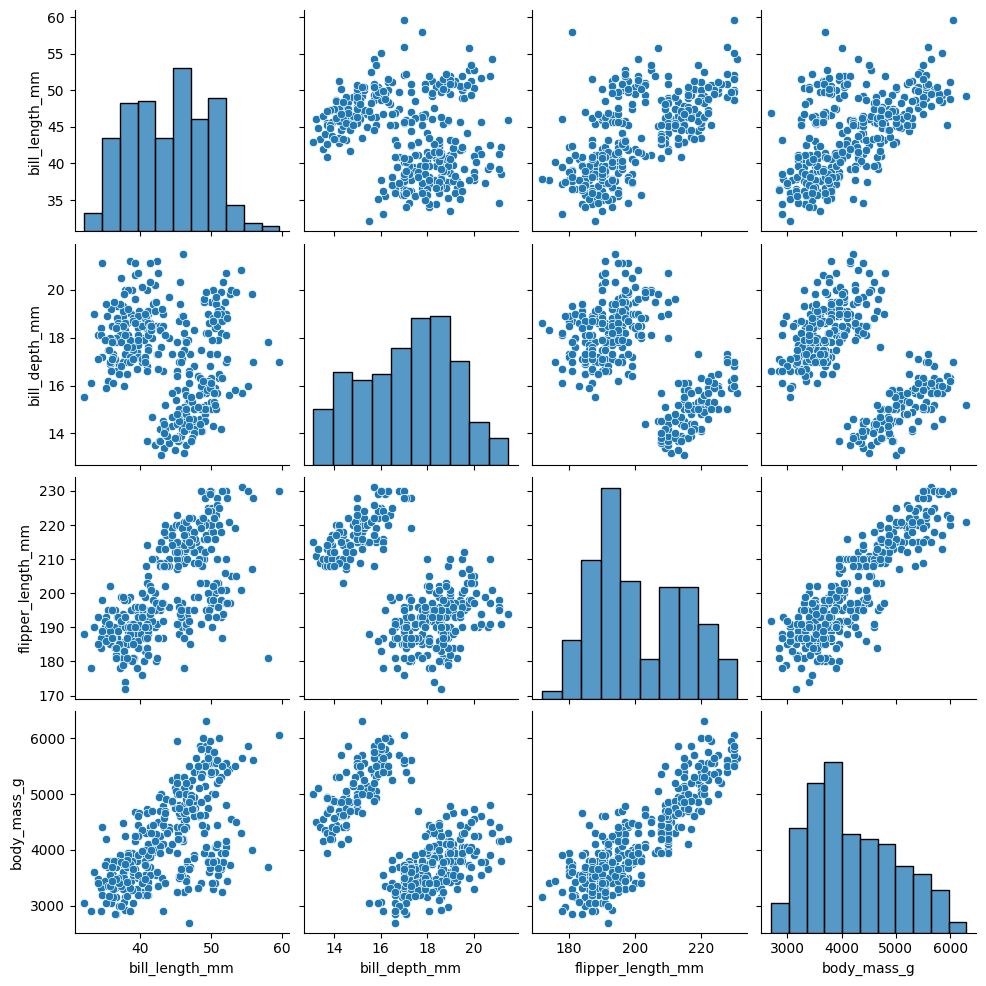

In [5]:
# Use pairplot
# Looks like there is positive correlation
sns.pairplot(penguins)

<li>Use hue for the "island" column, <span style="color: red; font-weight: bold;">what can you see in the data this way?</span></li>

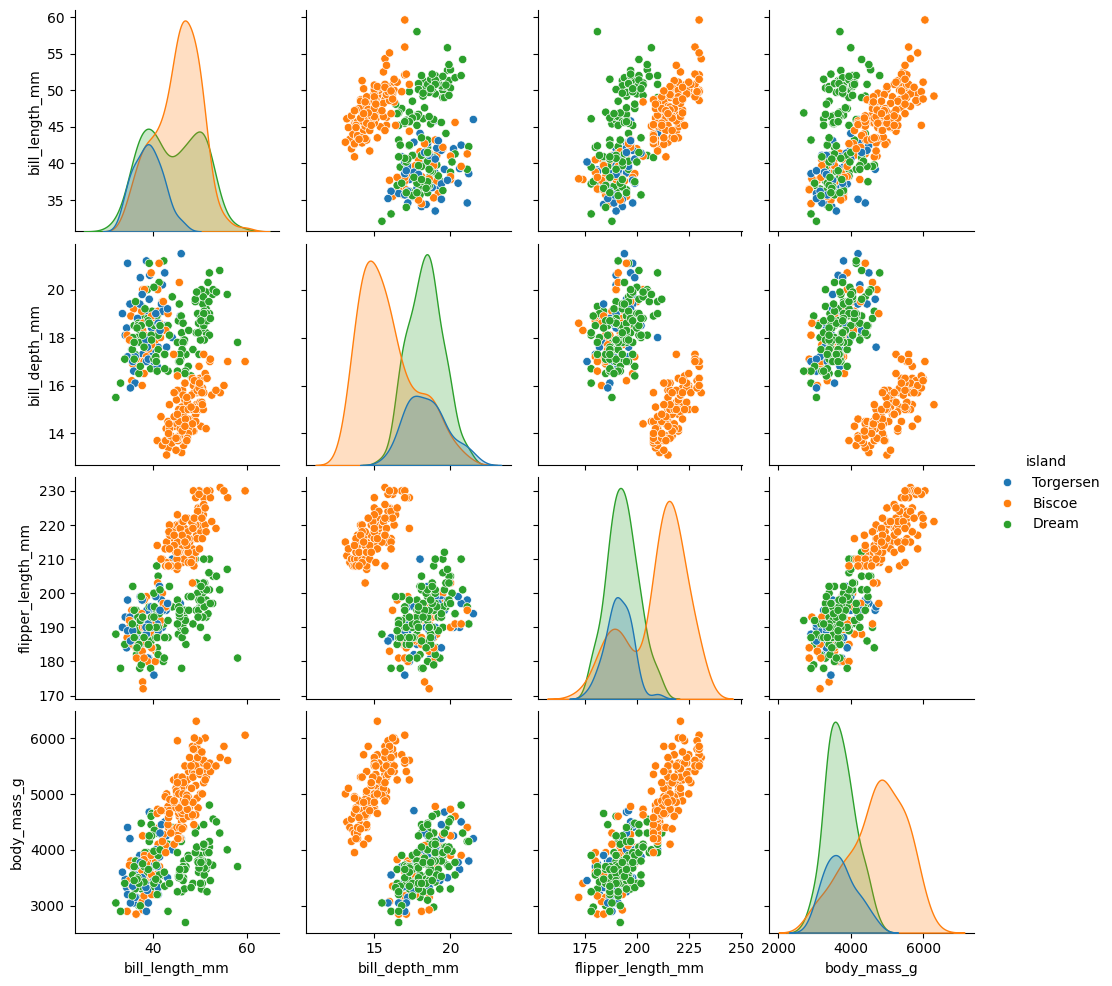

In [6]:
# Use pairplot, hue island
sns.pairplot(penguins, hue='island')

<ul>
    <li>Find the amount of penguins on each island by using pandas (<b>value_counts()</b>). <span style="color: red; font-weight: bold;">Which island is different compared to others?</span></li>
    <ul>
        <li><b>Small extra task:</b> visualize the counts with a bar plot</li>
    </ul>
</ul>

In [ ]:
# code here

<ul>
    <li>Create now another pair plot, and use hue for the "species" –column</li>
    <ul>
        <li style="color: red; font-weight: bold;">Is there a difference in the distributions when using hue for the islands instead?</li>
        <li><b>Bonus task:</b> <span style="color: red; font-weight: bold;">How much does the "sex"-column affect the result?</span> (MALE / FEMALE)</li>
    </ul>
</ul>

In [1]:
# code here

<ul>
    <li>Create a scatter plot for <b><i>bill_length_mm</i></b> and <b><i>flipper_length_mm</i></b>, use species as hue (try also island as hue)</li>
    <ul>
        <li style="color: red; font-weight: bold;">Which affects the result more, species or island?</li> 
    </ul>
</ul>

In [ ]:
# code here

<ul>
    <li>Use box plots, violin plots or swarm plots:</li>
    <ul>
        <li>inspect the following information:</li>
        <ul>
            <li><b></i>flipper_length_mm</i></b></li>
            <li><b></i>bill_length_mm</i></b></li>
            <li><b></i>body_mass_g</i></b></li>
        </ul>
        <li>hue = island,  x= species</li>
        <ul>
            <li style="color: red; font-weight: bold;">What interesting insights/findings can you see in the data this way? </li>
            <li style="color: darkred; font-weight: bold;">Or in other words: "how the data works regarding the variables above?" </li>
        </ul>
    </ul>
</ul>

In [ ]:
# code here

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/penguins.png" />


<h4><b>2. In this exercise, use the 'mpg' dataset from seaborn! </b></h4>
<b>-> sns.load_dataset('mpg')</b>
<p>
mpg stands for "miles per gallon", which is a common way to represent fuel consumption in USA.
</p>


<b>Clean up the data (instructions and tasks below)</b>

<ul>
<li>Create a new column: <b>"liters_per_100km"</b> , which converts the mpg to liters per 100 km</li>
<ul>
<li>You can Google the conversion formula easily: "miles per gallon to liters per 100km" or "How do you convert MPG to l 100km?"
</li>
<li>remove the original mpg –column after this</li>
</ul>

</ul>

In [ ]:
# code here

<li>Remove the "name" -column</li>

In [ ]:
# code here

<ul>
<li>After this, create a correlation matrix. There are two
columns that do not correlate as much as the others,
remove these two from the dataset <span style="color: red; font-weight: bold;">(mention also which columns you decided to remove and why)</span></li>
<ul>
<li style="font-weight: bold;">Create also a heatmap of the correlation matrix after you remove the two unneeded columns</li>
</ul>
</ul>

In [2]:
# code here

<ul>
<li>There are three different columns that are strongly
connected to the car's efficiency (both power and
consumption), select one of them and remove the others
from the dataset
</li>
<ul>
<li style="color: red; font-weight: bold;">Which column is the best selection to indicate the
car’s efficiency, and why? (cylinders, horsepower or
displacement/engine size)</li>
<li style="color: darkred; font-weight: bold;">Remember: look at the big picture, also compare how well the variables correlate to other variables than just the consumption</li>
</ul>
</ul>

In [1]:
# code here

<ul>
    <li><b>Finally, use the pair plot and hue (origin)</b></li>
    <ul>
        <li style="color: red; font-weight: bold;">Which origin country tends have bigger fuel consumption in
cars?</li>
<li><span style="color: red; font-weight: bold;">Which is generally the origin with lowest consumption?</span>
(more specific plots might be a good idea here, for example:
box plot, scatter plot etc., pandas functions are helpful too!)</li>
<li style="color: red; font-weight: bold;">What other features the cars seem to have that result into
bigger or lower consumption?</li>
    </ul>
</ul>

In [ ]:
# code here

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mpg.png" />


<h4><b>3. csv-data, pandas and seaborn, groceries data</b></h4>


<p>
This dataset has been downloaded from <b><i>kaggle.com</i></b>.<br />
Download the "groceries.csv" from Moodle.
<br /><br />
Load the data by using pandas. (read_csv() etc.)
<br /><br />

<b>Note:</b> since this is an actual dataset from the internet, the data is in quite a rough format.

</p>

<li>If you take a look at the data, you will notice three columns have NaN –
values. You can either remove these columns all together, or you can fill
the missing values with average values of that column. For example, for
the Fish -column you could do something like this:<br /><br />

<b>df['Fish'].fillna((df['Fish'].mean()), inplace=True)</b><br /><br />
In this case, food is the name of the DataFrame we just got from the csv-file. Do this same operation to the two other columns with missing
values.</li>

In [ ]:
# handle incomplete rows here, justify your approach on how you handled them

<ul>
<li>In this data, the date column is a bit difficult to use, since it's not
completely in numerical format. Split the Month-column so, that you
have two different columns: Month and Year</li>
<ul>
<li>For month, use a numeric format 1-12</li>
<li>For year, use the full year 1990-2020</li>
<li>Check out the examples in Moodle, this one is a bit tricky, but
very neat to know how it's done!</li>
</ul>
</ul>

In [ ]:
# code here

<li>After the cleanups, create a correlation matrix of the data. Create a heatmap on the correlations as well.
<br /><br />
<span style="color: red; font-weight: bold;">Which grocery stands out?</span> (i.e. there seems to be one grocery item
whose price doesn't follow other groceries at all)
</li>

In [2]:
# code here

<li style="color: red; font-weight: bold;">Which groceries seem to correlate to each other's prices? What do they have in common?</li>

In [ ]:
# code here

<b>Bonus task:</b>
<p>Sometimes data can also reflect history! For example, "Corn" and some
other foods seem to have a notable peak in its price in one of the years.
Find this year, and Google if you can find a reason for the price peak (for
example, search: "us corn expensive XXXX". <span style="color: red; font-weight: bold;">Can you find any other food
that has relation to a real world event in a similar in this dataset?</span></p>
<p><b>Tip:</b> use pivot table and heatmap! Remember also, the first year in the
dataset might show as blank white, that means there's no data. You
should also split the date</p>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/food.png" />


<h4><b>4. csv-data, pandas and seaborn, mobile phone data, regression plots</b></h4>


<p>This dataset has been downloaded from <b><i>kaggle.com</i></b> and modified. <br />
Download the "mobilephones.csv" from Moodle.  Load the data by using pandas.  (read_csv() etc.)</p>

<p>
Regression plots (<b>lmplot()</b> in seaborn) are often extremely useful in finding more insight and "hidden connections" in your data. </p>

<p>
Remember to also check out the confidence interval, if it's wide around the regression line = there's usually fluctuation within the values. <br />Narrow line => the linear connection is quite evident.</p>


<b>With the mobile phone data, do the following:</b>

<ul>

<li>Use regression plot for RAM and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>



</ul>

In [ ]:
# code here

<ul>
<li>Use regression plot for RAM and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [ ]:
# code here

<ul>
<li>Use regression plot for BatteryCapacity and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>


</ul>

In [ ]:
# code here

<ul>
<li>Use regression plot for BatteryCapacity and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [ ]:
# code here

<ul>
<li><b>Bonus task:</b> Use regression plot for ScreenSize and Price, without and with hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">Compare the correlations with and without hue. Is there a difference?</li>
</ul>
</ul>

In [ ]:
# optional bonus task code here

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mobilephone.png" />


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li>1. <b>seaborn:</b> Try out Boxenplot and/or Dendrogram in any of the previous
dataset exercises. Do these plot types provide some interesting info on
the data? (Google for examples on these plot types)</li>
<ul>
<li>You may also consider some other plots, for example:
<b>displot, catplot, relplot</b></li>
</ul>
</ul>

In [3]:
# code for the advanced extra task

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

In [1]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>


In [ ]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

In [ ]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [ ]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding